## Пример линейной регрессии

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [2]:
# используем открытый датасет

diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# для примера берем один признак
x = diabetes.data[:, np.newaxis, 2]

In [5]:
x[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [6]:
y = diabetes.target

In [7]:
# строим модель
regr = linear_model.LinearRegression()
regr.fit( x, y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

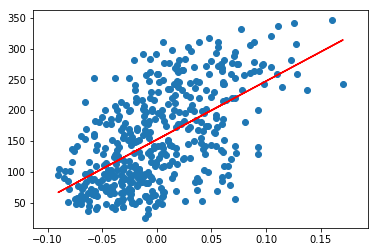

In [8]:
plt.scatter( x, y )
plt.plot( x, regr.predict( x ), color = 'red' )
plt.show()

In [9]:
regr.intercept_

152.1334841628967

In [10]:
regr.coef_

array([949.43526038])

In [19]:
metrics.mean_squared_error(y, regr.predict(x))

3890.4565854612724

In [36]:
import numpy as np



class LinearRegression:
    """
    The simple linear regression model is
        y = bX + e  where e ~ N(0, sigma^2 * I)
    In probabilistic terms this corresponds to
        y - bX ~ N(0, sigma^2 * I)
        y | X, b ~ N(bX, sigma^2 * I)
    The loss for the model is simply the squared error between the model
    predictions and the true values:
        Loss = ||y - bX||^2
    The MLE for the model parameters b can be computed in closed form via the
    normal equation:
        b = (X^T X)^{-1} X^T y
    where (X^T X)^{-1} X^T is known as the pseudoinverse / Moore-Penrose
    inverse.
    """

    def __init__(self, fit_intercept=True):
        self.beta = None
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
            print('X:\n', X)
            
        inv = np.linalg.inv(np.dot(X.T, X))
        print('inv:\n', inv)
        pseudo_inverse = np.dot(inv, X.T)
        print('pseudo_Inv:\n', pseudo_inverse)
        self.beta = np.dot(pseudo_inverse, y)
        print ('beta:\n', self.beta)

    def predict(self, X):
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.beta)


class RidgeRegression:
    """
    Ridge regression uses the same simple linear regression model but adds an
    additional penalty on the L2-norm of the coefficients to the loss function.
    This is sometimes known as Tikhonov regularization.
    In particular, the ridge model is still simply
        y = bX + e  where e ~ N(0, sigma^2 * I)
    except now the error for the model is calcualted as
        RidgeLoss = ||y - bX||^2 + alpha * ||b||^2
    The MLE for the model parameters b can be computed in closed form via the
    adjusted normal equation:
        b = (X^T X + alpha I)^{-1} X^T y
    where (X^T X + alpha I)^{-1} X^T is the pseudoinverse / Moore-Penrose
    inverse adjusted for the L2 penalty on the model coefficients.
    """

    def __init__(self, alpha=1, fit_intercept=True):
        """
        A ridge regression model fit via the normal equation.
        Parameters
        ----------
        alpha : float (default: 1)
            L2 regularization coefficient. Higher values correspond to larger
            penalty on the l2 norm of the model coefficients
        fit_intercept : bool (default: True)
            Whether to fit an additional intercept term in addition to the
            model coefficients
        """
        self.beta = None
        self.alpha = alpha
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
            

        A = self.alpha * np.eye(X.shape[1])
        print('A:\n', X)
        
        
        pseudo_inverse = np.dot(np.linalg.inv(X.T @ X + A), X.T)
        self.beta = pseudo_inverse @ y

    def predict(self, X):
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.beta)

In [37]:
linreg_cust = LinearRegression()

In [38]:
linreg_cust.fit(x, y)

X:
 [[ 1.00000000e+00  6.16962065e-02]
 [ 1.00000000e+00 -5.14740612e-02]
 [ 1.00000000e+00  4.44512133e-02]
 [ 1.00000000e+00 -1.15950145e-02]
 [ 1.00000000e+00 -3.63846922e-02]
 [ 1.00000000e+00 -4.06959405e-02]
 [ 1.00000000e+00 -4.71628129e-02]
 [ 1.00000000e+00 -1.89470584e-03]
 [ 1.00000000e+00  6.16962065e-02]
 [ 1.00000000e+00  3.90621530e-02]
 [ 1.00000000e+00 -8.38084235e-02]
 [ 1.00000000e+00  1.75059115e-02]
 [ 1.00000000e+00 -2.88400077e-02]
 [ 1.00000000e+00 -1.89470584e-03]
 [ 1.00000000e+00 -2.56065715e-02]
 [ 1.00000000e+00 -1.80618869e-02]
 [ 1.00000000e+00  4.22955892e-02]
 [ 1.00000000e+00  1.21168511e-02]
 [ 1.00000000e+00 -1.05172024e-02]
 [ 1.00000000e+00 -1.80618869e-02]
 [ 1.00000000e+00 -5.68631216e-02]
 [ 1.00000000e+00 -2.23731352e-02]
 [ 1.00000000e+00 -4.05032999e-03]
 [ 1.00000000e+00  6.06183944e-02]
 [ 1.00000000e+00  3.58287167e-02]
 [ 1.00000000e+00 -1.26728266e-02]
 [ 1.00000000e+00 -7.73415510e-02]
 [ 1.00000000e+00  5.95405824e-02]
 [ 1.00000000e+0

In [33]:
linreg_cust.beta

array([152.13348416, 949.43526038])

In [34]:
y_pred = linreg_cust.predict(x)

In [35]:
metrics.mean_squared_error(y, y_pred)

3890.4565854612724

In [39]:
metrics.mean_squared_error(y, regr.predict(x))

3890.4565854612724

In [ ]:
# Решение находится аналитически через нахождение 
# обратной матрицы матрицы Грамма Х (X.T@X)
# с последующим ее матричным умножением на транспонированную матрицу X.
# точность ручного решения и "из коробки" sklearn - одинаковая